## 4.3 点推定

In [1]:
height <- c(165.2, 175.9, 161.7, 174.2, 172.1, 163.3, 170.9, 170.6, 168.4, 171.3)

In [2]:
mean(height)

[1] 169.36

In [3]:
var(height)

[1] 21.66711

## 4.4 推定値がどれくらい当てになるのかを調べる方法

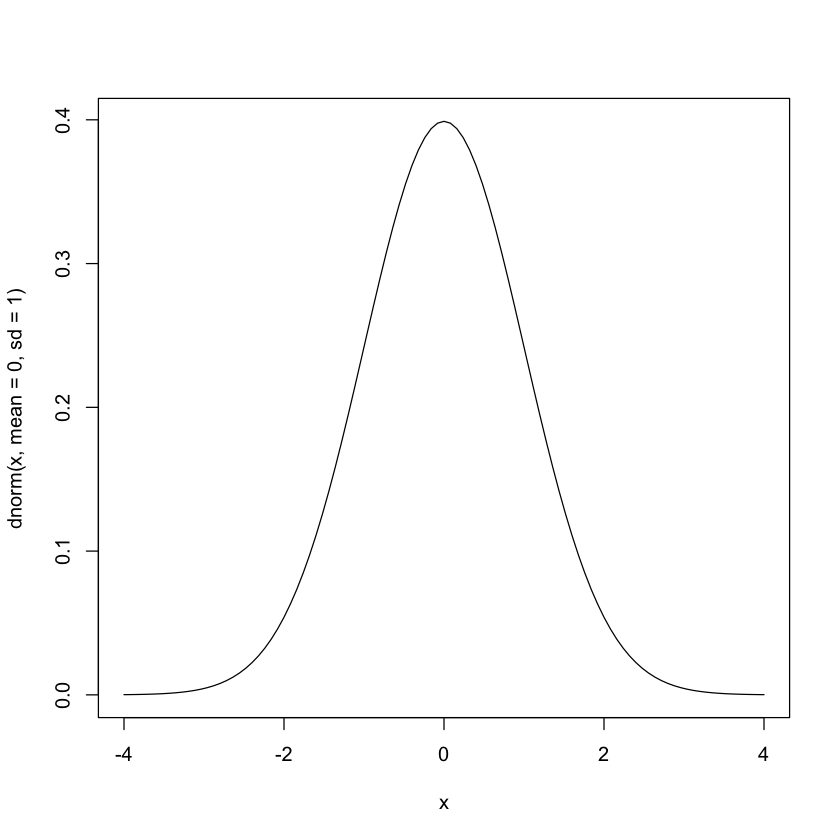

In [4]:
curve(dnorm(x, mean=0, sd=1), from=-4, to=4)

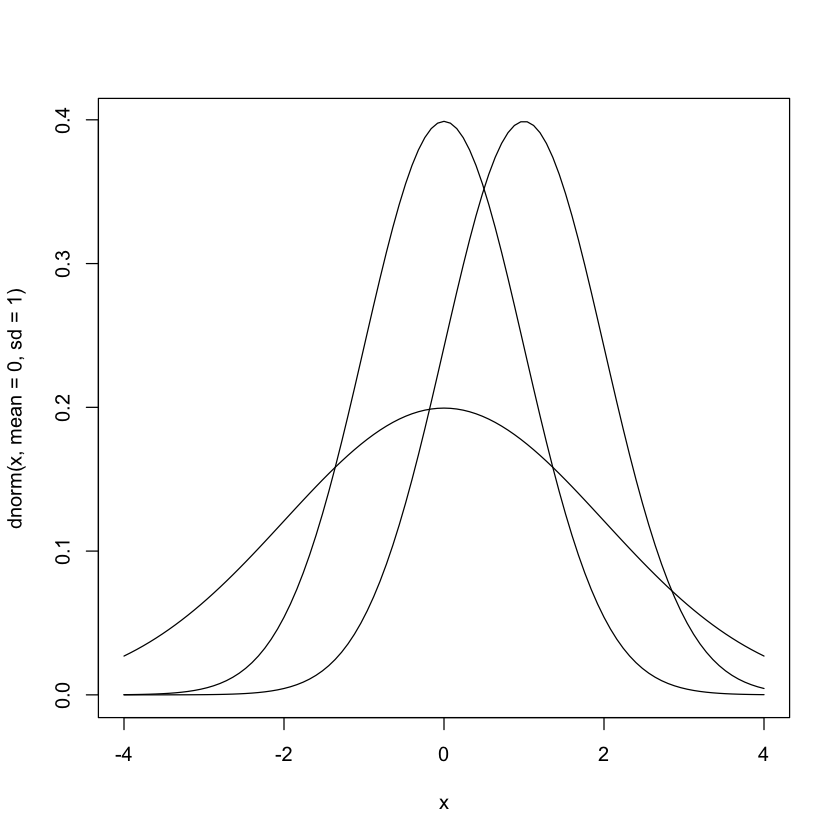

In [5]:
curve(dnorm(x, mean=0, sd=1), from=-4, to=4)
curve(dnorm(x, mean=1, sd=1), add=TRUE)
curve(dnorm(x, mean=0, sd=2), add=TRUE)

In [6]:
rnorm(n=5, mean=50, sd=10)

[1] 50.69510 44.38216 46.25078 43.50443 45.79785

In [7]:
rnorm(n=5, mean=50, sd=10)

[1] 37.26203 64.53043 52.58564 47.13090 51.36300

In [8]:
sample <- rnorm(n=5, mean=50, sd=10)
sample

[1] 56.69423 45.30435 63.69042 39.27663 58.41492

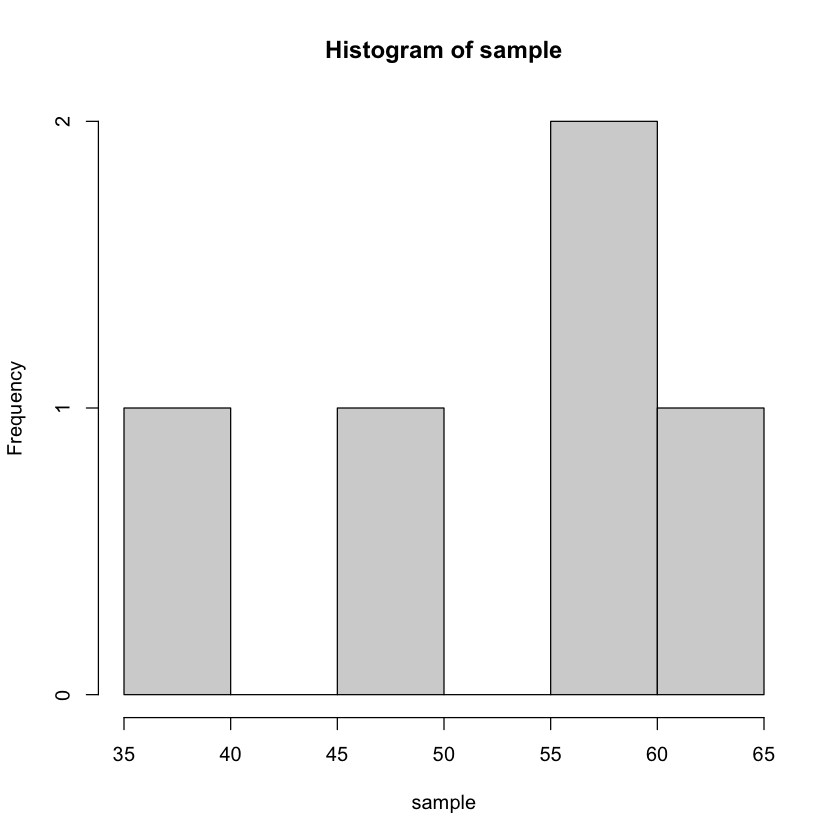

In [9]:
hist(sample)

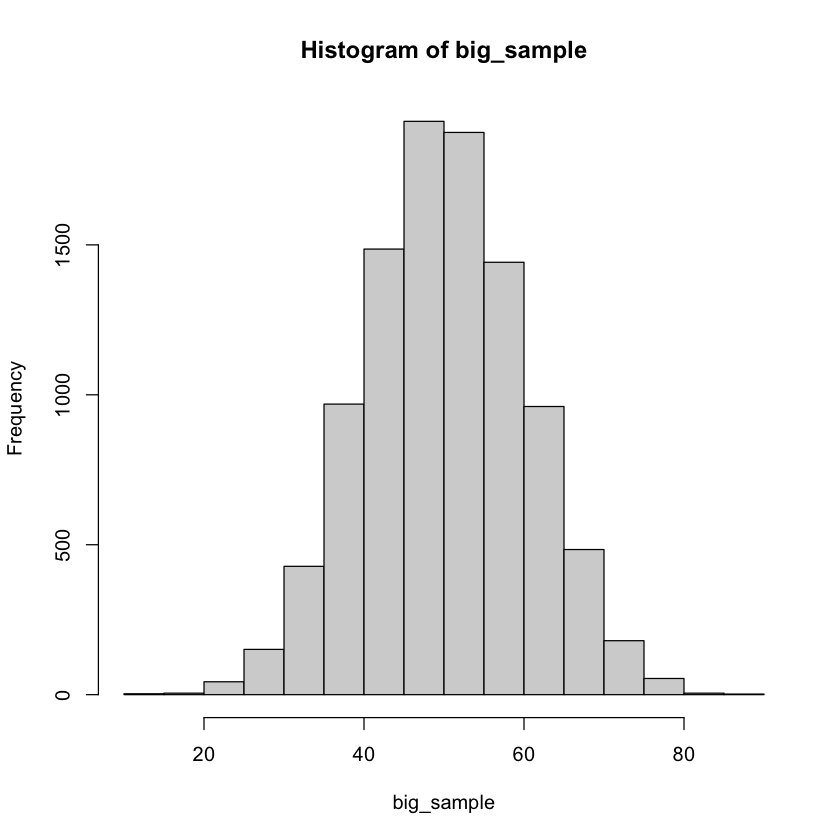

In [10]:
big_sample <- rnorm(n=10000, mean=50, sd=10)
hist(big_sample)

In [11]:
sample <- rnorm(n=10, mean=50, sd=10)
sample # 一応，データの確認

[1] 28.44570 42.62228 55.28554 59.45835 55.44545 45.13114 53.38964 41.62898
 [9] 35.12585 65.43537

In [12]:
mean(sample)

[1] 48.19683

In [13]:
sample <- rnorm(n=10, mean=50, sd =10)
sample

[1] 64.17383 48.60838 44.54920 53.86663 40.81189 61.40320 56.61196 51.72693
 [9] 52.28401 56.49172

In [14]:
mean(sample)

[1] 53.05277

In [15]:
sample <- rnorm(n=10, mean=50, sd=10)
sample

[1] 53.29689 45.58319 66.78138 44.23752 55.89607 47.79302 59.65693 55.28009
 [9] 52.28755 53.65951

In [16]:
mean(sample)

[1] 53.44722

In [17]:
sample_mean <- numeric(length=10000) # 推定値を格納する場所を予約

for(i in 1:10000){ # 中括弧に囲まれた処理を10000回繰り返す
    sample <- rnorm(n=10, mean=50, sd=10) # N(50, 10^2)からn=10の標本を抽出
    sample_mean[i] <- mean(sample) # 標本平均を計算する
}

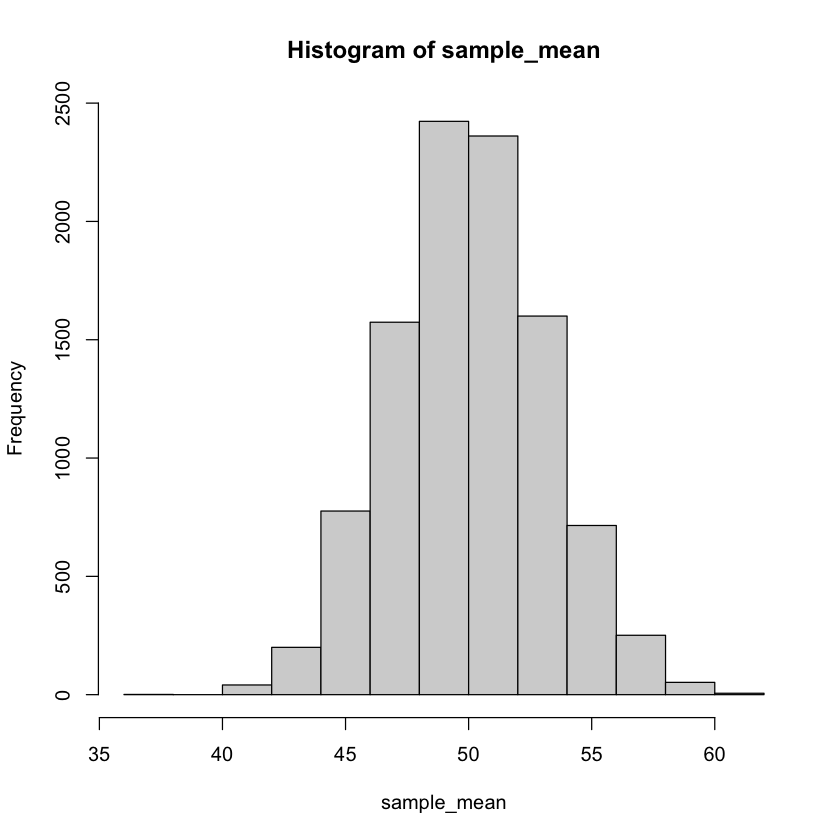

In [18]:
hist(sample_mean)

In [19]:
AV_error_5_or_less <- ifelse(abs(sample_mean - 50) <= 5, 1, 0) # AV: absolute value, 誤差絶対値5以下
table(AV_error_5_or_less)

AV_error_5_or_less
   0    1 
1095 8905 

In [20]:
mean(sample_mean)

[1] 50.01799

In [21]:
var(sample_mean)

[1] 9.767718

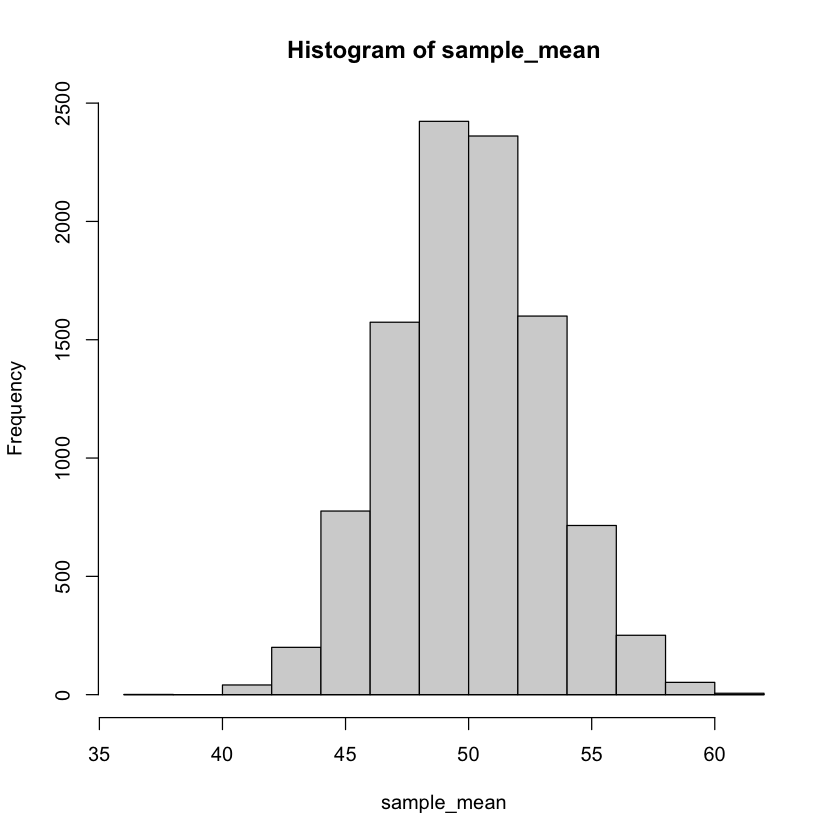

In [22]:
hist(sample_mean)
curve(dnorm(x, mean=50, sd=sqrt(10)), add=TRUE)

In [23]:
dnorm(50, mean=50, sd=sqrt(10))

[1] 0.1261566

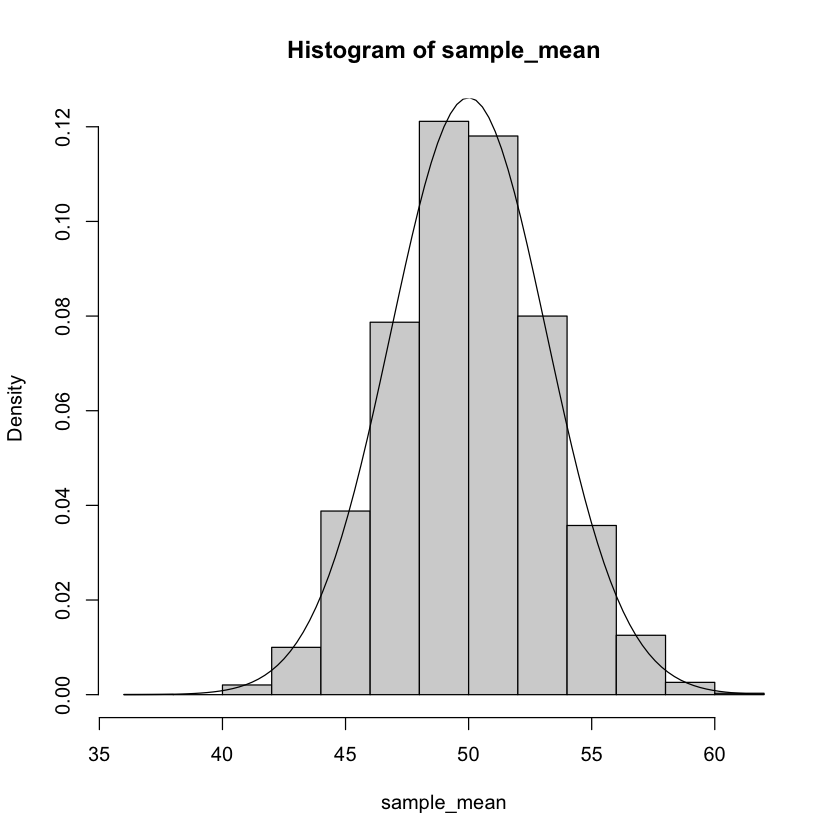

In [24]:
hist(sample_mean, freq=FALSE)
curve(dnorm(x, mean=50, sd=sqrt(10)), add=TRUE)

In [25]:
sample_mean <- numeric(length=10000) # 推定値を格納する場所を予約

for(i in 1:10000){ # 中括弧に囲まれた処理を10000回繰り返す
    sample <- rnorm(n=100, mean=50, sd=10) # N(50, 10^2)からn=100の標本を抽出
    sample_mean[i] <- mean(sample) # 標本平均を計算する
}

In [26]:
var(sample_mean)

[1] 1.001197

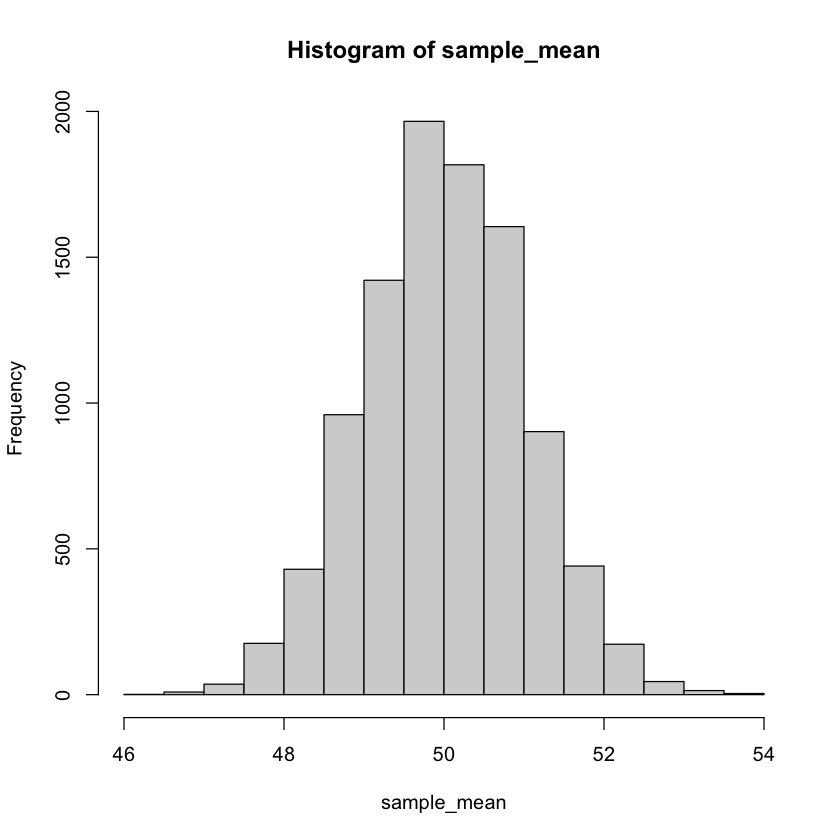

In [27]:
hist(sample_mean)

In [28]:
# var_samp: 標本分散
var_samp <- numeric(length=10000) # 推定値を格納する場所を確保
# var_ub: 不偏分散
var_ub <- numeric(length=10000) # 推定値を格納する場所を確保

for(i in 1:10000){ #中括弧に囲まれた処理を10000回繰り返す
    sample <- rnorm(n=10, mean=50, sd=10) # N(50, 10^2)から n=10 の標本を抽出
    var_samp[i] <- mean((sample - mean(sample))^2) # 標本分散を計算する
    var_ub[i] <- var(sample) # 不偏分散を計算する
}

In [29]:
mean(var_samp)

[1] 89.92269

In [30]:
mean(var_ub)

[1] 99.9141

In [31]:
sd(var_samp)

[1] 42.40821

In [32]:
sd(var_ub)

[1] 47.12023

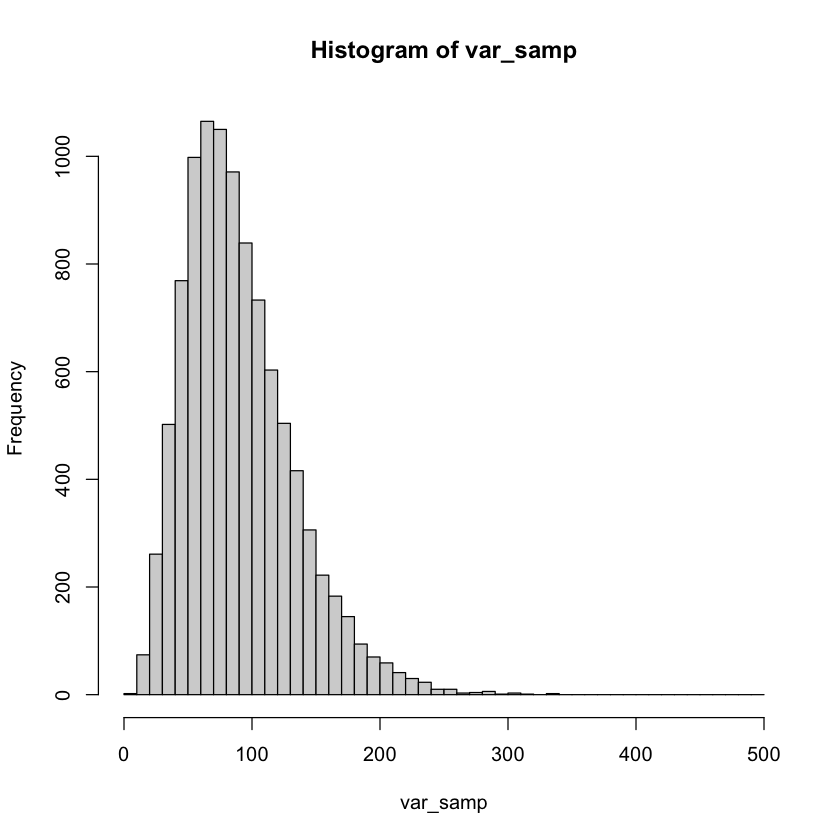

In [33]:
hist(var_samp, breaks=seq(0, 500, 10))

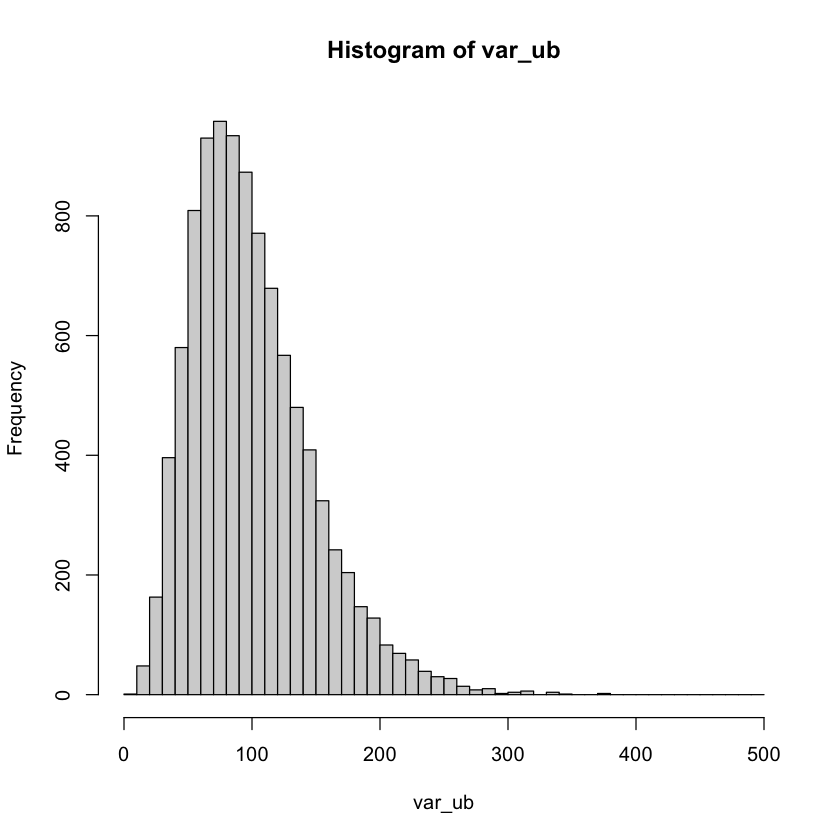

In [34]:
hist(var_ub, breaks=seq(0, 500, 10))

In [35]:
# var_samp_err_100om: 標本分散誤差100以上, om: or more
var_samp_err_100om <- ifelse(var_samp >= 200, 1, 0)
# var_ub_err_100om: 標本分散誤差100以下, om: or more
var_ub_err_100om <- ifelse(var_ub >= 200, 1, 0)

In [36]:
table(var_samp_err_100om)

var_samp_err_100om
   0    1 
9807  193 

In [37]:
table(var_ub_err_100om)

var_ub_err_100om
   0    1 
9643  357 

In [38]:
mean(sqrt(var_ub))

[1] 9.725501

In [39]:
sample_mean <- numeric(length=10000) # 推定値を格納する場所を確保
sample_median <- numeric(length=10000) # 推定値を格納する場所を確保

for(i in 1:10000){
    #中括弧に囲まれた処理を10000回繰り返す
    sample <- rnorm(n=10, mean=50, sd=10) # N(50, 10^2)から n=10 の標本を抽出
    sample_mean[i] <- mean((sample)) # 標本平均を計算する
    sample_median[i] <- median(sample) # 標本中央値を計算する
}

In [40]:
mean(sample_mean)

[1] 50.03185

In [41]:
mean(sample_median)

[1] 50.03089

In [42]:
sd(sample_mean)

[1] 3.134526

In [43]:
sd(sample_median)

[1] 3.70398